**Depression Detection:** Detect whether a person has depression or not

**Installing and Importing Dependencies**

In [1]:
pip install xgboost

In [ ]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import VotingClassifier

**Read Data**

In [ ]:
# loading the csv data to a Pandas DataFrame
dep_data = pd.read_csv('/content/b_depressed.csv')

In [ ]:
# print first 5 row of the dataset
dep_data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
# number of rows and columns in the dataset
dep_data.shape

(1429, 23)

In [ ]:
# getting some info about the data
dep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
# checking for missing data
dep_data.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

There are 20 missing values in no_lasting_investmen feature.

Imputaion: replace missing values with central tendencies(mean, median, mode)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


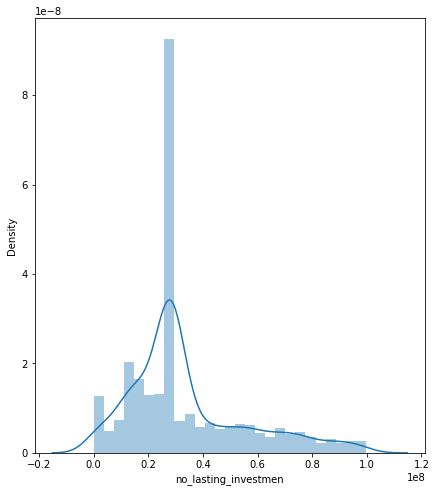

In [ ]:
# analyse distribution of data in no_lasting_investment feature
fig, ax = plt.subplots(figsize = (7,8))
sns.distplot(dep_data.no_lasting_investmen)

---
from the distribution we can see that the data is skewed towards


right side. So, for imputation we cannot use mean value. We can use either median or mode for replacing missing values.

for our model we will be using median for imputation

In [ ]:
# Fill null values with median values
dep_data['no_lasting_investmen'].fillna(dep_data['no_lasting_investmen'].median(), inplace=True)

In [ ]:
# check if there is any null value or not
dep_data.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

We have to remove the 'Survey_id' and 'Ville_id' columns because those datas are not useful for our classification model

In [ ]:
# drop unneccesary columns
dep_data = dep_data.drop(['Survey_id','Ville_id'],axis=1)

In [ ]:
# display first 5 data
dep_data.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


**Relation between features used and depression**


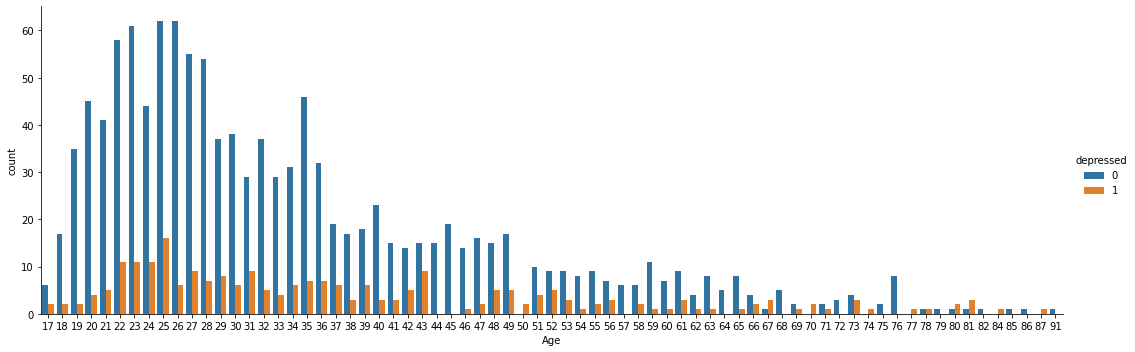

In [ ]:
# relation between age and depressed
age = sns.catplot(x="Age", hue="depressed",data=dep_data, kind="count",aspect=3)

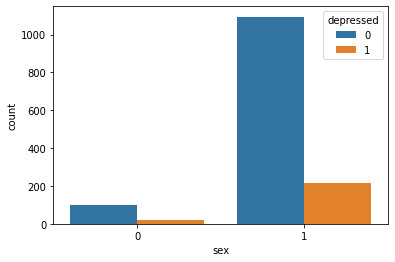

In [ ]:
# relation between sex and depressed
sns.countplot(x='sex', hue='depressed', data=dep_data)

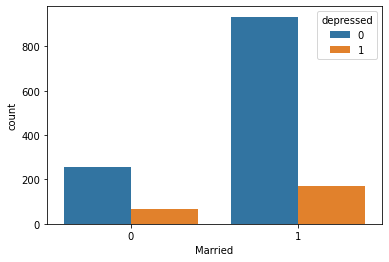

In [ ]:
# relation between married and depressed
sns.countplot(x='Married', hue='depressed', data=dep_data)

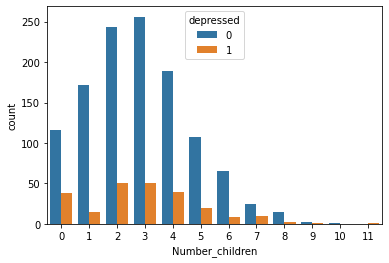

In [ ]:
# relation between number of child and depressed
sns.countplot(x='Number_children', hue='depressed', data=dep_data)

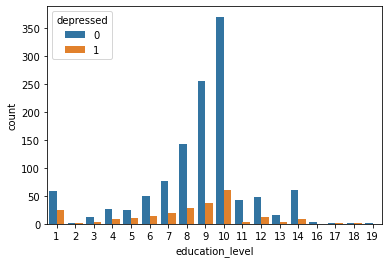

In [ ]:
# relation between education level and depressed
sns.countplot(x='education_level', hue='depressed', data=dep_data)

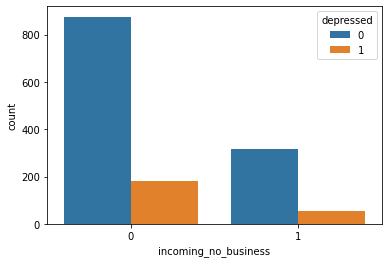

In [ ]:
# relation between incoming no business and depressed
sns.countplot(x='incoming_no_business', hue='depressed', data=dep_data)

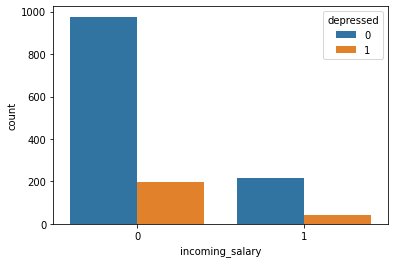

In [ ]:
# relation between incoming salary and depressed
sns.countplot(x='incoming_salary', hue='depressed', data=dep_data)

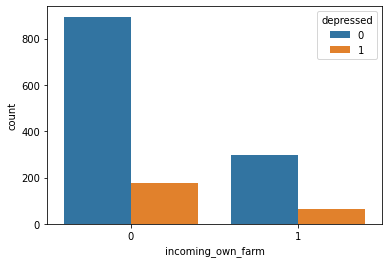

In [ ]:
# relation between incoming own farn and depressed
sns.countplot(x='incoming_own_farm', hue='depressed', data=dep_data)

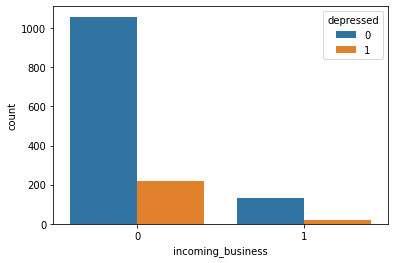

In [ ]:
# relation between incoming business and depressed
sns.countplot(x='incoming_business', hue='depressed', data=dep_data)

**Correlation Matrix**

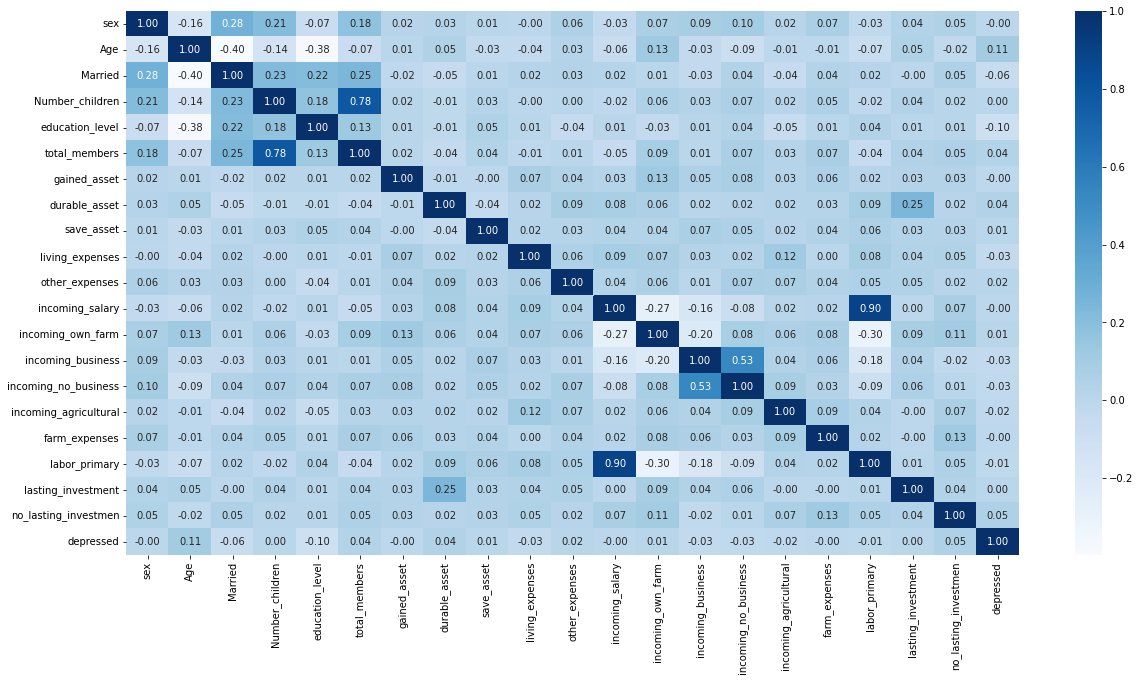

In [ ]:
# create correlation matrix
plt.subplots(figsize=(20,10))
sns.heatmap(dep_data.corr(), annot = True, fmt = ".2f", cmap='Blues')
plt.show()

**Check if the dataset is balanced or not**

In [ ]:
# check if the dataset is balanced or not
dep_data.depressed.value_counts()

0    1191
1     238
Name: depressed, dtype: int64

0 --> Not depressed

1 --> Depressed

Unbalanced Data: 1191 data of not depressed person and only 238 data for depressed person.

Balancing the Data by Over Sampling

**Over Sampling**

In [ ]:
# count each class from depressed column
count_class_0, count_class_1 = dep_data.depressed.value_counts()

In [ ]:
dep_data_class_0 = dep_data[dep_data['depressed'] == 0]
dep_data_class_1 = dep_data[dep_data['depressed'] == 1]

In [ ]:
print(dep_data_class_0.shape, dep_data_class_1.shape)

(1191, 21) (238, 21)


In [ ]:
# create over sampling for class 1
dep_data_class_1_over = dep_data_class_1.sample(count_class_0, replace=True)

In [ ]:
dep_data_class_1_over.shape

(1191, 21)

In [ ]:
#concat for merging
dep_data_over = pd.concat([dep_data_class_0, dep_data_class_1_over], axis=0)

In [ ]:
dep_data_over.shape

(2382, 21)

**Spliting data for training and testing**

---



 80% data will be used to train and rest will be used for testing.


In [ ]:
# divide feature and target columns
X = dep_data_over.drop('depressed', axis = 1)
y = dep_data_over['depressed']

In [ ]:
# split our dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)

**Classification Models**

---



Logistic Model

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
# train model
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# make predicton for test dataset
logistic_prediction = logistic_model.predict(X_test)

In [ ]:
# check accuracy
accuracy_score(y_test, logistic_prediction)

0.5136268343815513

In [ ]:
# print classification report for logistic model
print(classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.53      0.30      0.38       239
           1       0.51      0.73      0.60       238

    accuracy                           0.51       477
   macro avg       0.52      0.51      0.49       477
weighted avg       0.52      0.51      0.49       477



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


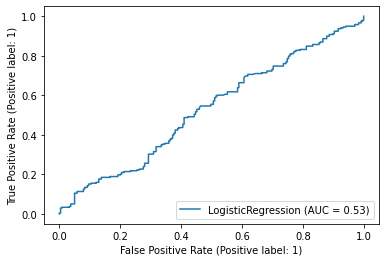

In [ ]:
# plot roc_curve for logistic model
plot_roc_curve(logistic_model, X_test, y_test)
plt.show()

In [ ]:
cm_logistic = confusion_matrix(y_test, logistic_prediction)

Text(33.0, 0.5, 'Truth')

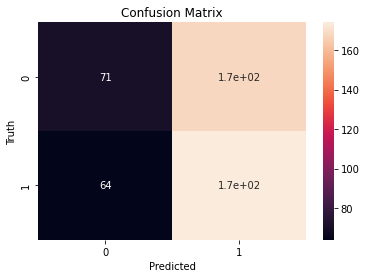

In [ ]:
# plot confusion matrix for logistic model
sns.heatmap(cm_logistic, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

---
Decision Tree Model


In [ ]:
# define decision tree model with max leaf node 500
decision_tree_model = tree.DecisionTreeClassifier(max_leaf_nodes=500)

In [ ]:
# train model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=500)

In [ ]:
# make prediction for test dataset
decision_tree_prediction = decision_tree_model.predict(X_test)

In [ ]:
# check accuracy of the model
accuracy_score(y_test, decision_tree_prediction)

0.9056603773584906

In [ ]:
# print classification report for decision tree model
print(classification_report(y_test, decision_tree_prediction))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90       239
           1       0.85      0.99      0.91       238

    accuracy                           0.91       477
   macro avg       0.92      0.91      0.91       477
weighted avg       0.92      0.91      0.91       477



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


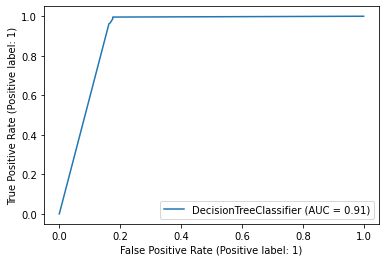

In [ ]:
# plot roc_curve for decision tree model
plot_roc_curve(decision_tree_model, X_test, y_test)
plt.show()

In [ ]:
cm_decision_tree = confusion_matrix(y_test, decision_tree_prediction)

Text(33.0, 0.5, 'Truth')

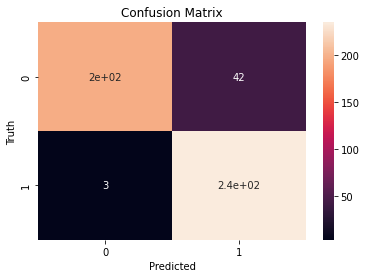

In [ ]:
# plot confusion matrix for decision tree model
sns.heatmap(cm_decision_tree, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

---
Random Forest Model


In [ ]:
# define random forest model with n_estimators=50
random_forest_model = RandomForestClassifier(n_estimators=50)

In [ ]:
# train model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
# make prediction
random_forest_prediction = random_forest_model.predict(X_test)

In [ ]:
accuracy_score(y_test, random_forest_prediction)

0.939203354297694

In [ ]:
# print classification report for random forest model
print(classification_report(y_test, random_forest_prediction))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       239
           1       0.90      0.99      0.94       238

    accuracy                           0.94       477
   macro avg       0.94      0.94      0.94       477
weighted avg       0.94      0.94      0.94       477



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


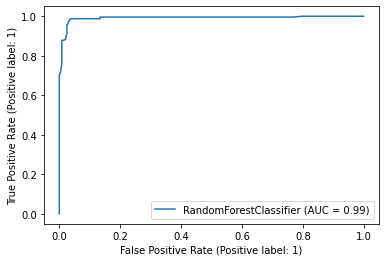

In [ ]:
# plot roc_curve for random forest model
plot_roc_curve(random_forest_model, X_test, y_test)
plt.show()

In [ ]:
cm_random_forest = confusion_matrix(y_test, random_forest_prediction)

Text(33.0, 0.5, 'Truth')

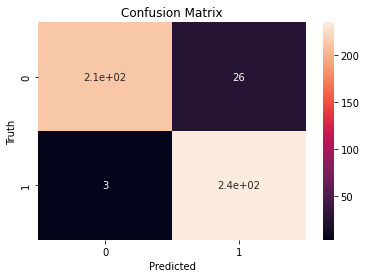

In [ ]:
# plot confusion matrix for random forest model
sns.heatmap(cm_random_forest, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

---
XGBoost Model


In [ ]:
# define XGBoost model with max_depth=20, epochs=200 and learning rate (eta) = 0.2
xgb_model = XGBClassifier(max_depth=30, eta=0.2, epochs=200)

In [ ]:
# train model
xgb_model.fit(X_train, y_train)

XGBClassifier(epochs=200, eta=0.2, max_depth=30)

In [ ]:
# make prediction
xgb_prediction = xgb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, xgb_prediction)

0.9245283018867925

In [ ]:
# print classification report for xgboost model
print(classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       239
           1       0.88      0.99      0.93       238

    accuracy                           0.92       477
   macro avg       0.93      0.92      0.92       477
weighted avg       0.93      0.92      0.92       477



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


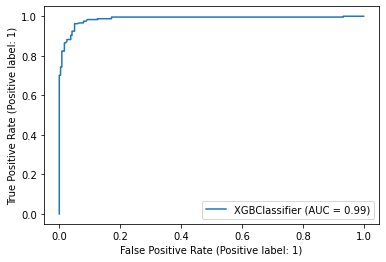

In [ ]:
# plot roc_curve for xgboost model
plot_roc_curve(xgb_model, X_test, y_test)
plt.show()

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_prediction)

Text(33.0, 0.5, 'Truth')

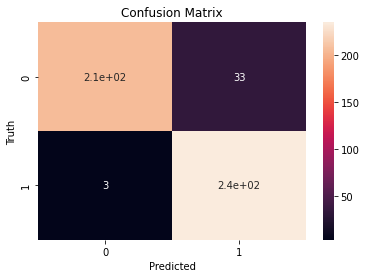

In [ ]:
# plot confusion matrix for xgboost model
sns.heatmap(cm_xgb, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**K-Fold Cross Validation**

In [ ]:
# define Stratified KFold cross validation with number of splits = 10
k_fold_strat = StratifiedKFold(n_splits=10)

logistic model

In [ ]:
logistic_results = cross_val_score(logistic_model, X, y, cv=k_fold_strat)

In [ ]:
# print logistic cross validation scores
print(logistic_results)

[0.51464435 0.55648536 0.53781513 0.48319328 0.55462185 0.50420168
 0.55042017 0.57983193 0.49579832 0.48319328]


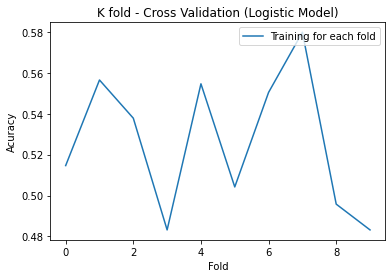

In [ ]:
# plot cross val score of logistic model
plt.plot(logistic_results)
plt.title('K fold - Cross Validation (Logistic Model)')
plt.ylabel('Acuracy')
plt.xlabel('Fold')
plt.legend(['Training for each fold'], loc='upper right')
plt.show()

In [ ]:
# print average score of cross validation scores
print(np.mean(logistic_results))

0.5260205337365071


decision tree model

In [ ]:
decision_tree_results = cross_val_score(decision_tree_model, X, y, cv=k_fold_strat)

In [ ]:
# print decision tree cross validation scores
print(decision_tree_results)

[0.89539749 0.90376569 0.90756303 0.91596639 0.89915966 0.86134454
 0.88235294 0.88235294 0.87815126 0.86554622]


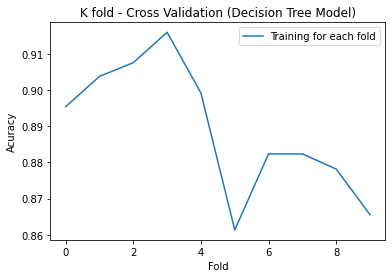

In [ ]:
# plot cross val score of decision tree model
plt.plot(decision_tree_results)
plt.title('K fold - Cross Validation (Decision Tree Model)')
plt.ylabel('Acuracy')
plt.xlabel('Fold')
plt.legend(['Training for each fold'], loc='upper right')
plt.show()

In [ ]:
# print average score of cross validation scores
print(np.mean(decision_tree_results))

0.8891600154706234


random forest model

In [ ]:
random_forest_results = cross_val_score(random_forest_model, X, y, cv=k_fold_strat)

In [ ]:
# print random forest cross validation scores
print(random_forest_results)

[0.958159   0.9623431  0.95798319 0.97478992 0.96218487 0.96218487
 0.95378151 0.94537815 0.94117647 0.96218487]


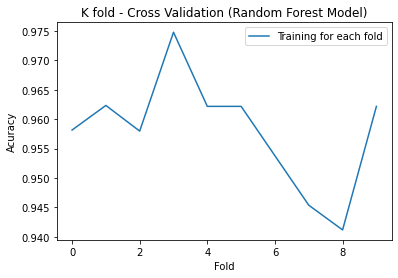

In [ ]:
# plot cross val score of random forest model
plt.plot(random_forest_results)
plt.title('K fold - Cross Validation (Random Forest Model)')
plt.ylabel('Acuracy')
plt.xlabel('Fold')
plt.legend(['Training for each fold'], loc='upper right')
plt.show()

In [ ]:
# print average score of cross validation scores
print(np.mean(random_forest_results))

0.9580165957596428


xgboost model

In [ ]:
xgb_results = cross_val_score(xgb_model, X, y, cv=k_fold_strat)

In [ ]:
# print xgboost cross validation scores
print(xgb_results)

[0.94979079 0.9707113  0.91176471 0.96638655 0.95378151 0.93277311
 0.94537815 0.94117647 0.89915966 0.92436975]


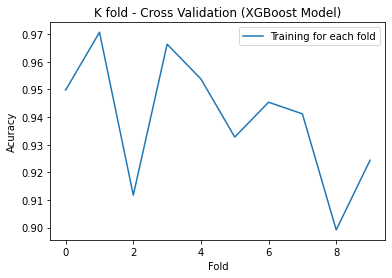

In [ ]:
# plot cross val score of xgboost model
plt.plot(xgb_results)
plt.title('K fold - Cross Validation (XGBoost Model)')
plt.ylabel('Acuracy')
plt.xlabel('Fold')
plt.legend(['Training for each fold'], loc='upper right')
plt.show()

In [ ]:
# print average score of cross validation scores
print(np.mean(xgb_results))

0.9395292008016597


Prediction Testing

In [ ]:
# choose 1 sample data from testing dataset
random_test_data = X_test.sample()

In [ ]:
# combines all 4 model a performs a voting method to give prediction
def makePrediction(random_test_data):
  predictions = []
  random_test_prediction_decision_tree = decision_tree_model.predict(random_test_data)
  random_test_prediction_random_forest = random_forest_model.predict(random_test_data)
  random_test_prediction_xgb = xgb_model.predict(random_test_data)
  predictions.extend([random_test_prediction_decision_tree[0], random_test_prediction_random_forest[0], random_test_prediction_xgb[0]])
  print(predictions) # print outputs of different models
  votes = 0
  for i in predictions:
    votes += i
  if votes > len(predictions)/2:
    print("This person has depression")
  else:
    print("This person doesn't have depression")

In [ ]:
# make prediction
makePrediction(random_test_data)

[0, 0, 0]
This person doesn't have depression
